## Final Project: Word Embedding

DIS SU22 Artficial Neural Network and Deep Learning
Daniel Florness, Heesang Han, Ed Keating
1 July 2022

In [16]:
%matplotlib inline

import numpy as np

from nltk.corpus import wordnet

import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')

import keras
import re
import math

import tensorflow.keras

import matplotlib.pyplot as plt

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\flord\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flord\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flord\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\flord\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
lyrics_file = open('beatles.txt', 'r')
text = lyrics_file.read()
lyrics_file.close()

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def preprocess(tokens):
    tokens_processed = []
    for words in tokens:
        if words in stop_words:
            continue
        if len(words) <= 2:
            continue

        tokens_processed.append(words)

    print(str(len(tokens_processed)) + ' tokens generated')
    return tokens_processed

def mapping(tokens):
    word_to_id = {}
    id_to_word = {}

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    print('Token Mapping Complete')

    return word_to_id, id_to_word

def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i),
            range(i, min(n_tokens, i + window + 1))
        )
        i_id = word_to_id[tokens[i]]
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(i_id, len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))

        if i%1000 == 0:
            print('Training Data Generated for ' + str(i) + ' Tokens')

    print('Training Data Generated')
    return np.array(X), np.array(y)

def concat(*iterables):
    for iterable in iterables:
        yield from iterable

def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

tokens = preprocess(tokenize(text))

word_to_id, id_to_word = mapping(tokens)
print(word_to_id)

X, y = generate_training_data(tokens, word_to_id, 3)

print(X.shape)

7260 tokens generated
Token Mapping Complete
{'fun': 0, 'four': 1, 'knock': 2, 'arizona': 3, 'department': 4, 'saloon': 5, 'sky': 6, 'guitar': 7, 'blink': 8, 'stating': 9, 'sharing': 10, 'bob': 11, 'newspaper': 12, 'want': 13, 'cigarette': 14, 'carousel': 15, 'fighting': 16, 'meant': 17, 'kill': 18, 'saving': 19, 'coat': 20, 'declare': 21, 'fix': 22, 'ago': 23, 'quit': 24, 'fancy': 25, 'mojo': 26, 'sat': 27, 'fall': 28, 'childlike': 29, 'bright': 30, 'shines': 31, 'made': 32, 'friends': 33, 'dakota': 34, 'queen': 35, 'aaaaaaaahhhh': 36, 'revolution': 37, 'medicine': 38, 'sunshine': 39, 'hah': 40, 'minds': 41, 'older': 42, 'talked': 43, 'music': 44, 'cuesto': 45, 'lose': 46, 'word': 47, 'allen': 48, 'car': 49, 'sergeant': 50, 'grinning': 51, 'endless': 52, 'pink': 53, 'like': 54, 'pain': 55, 'every': 56, 'matter': 57, 'edgar': 58, 'happiness': 59, 'booked': 60, 'imagine': 61, 'give': 62, 'lock': 63, 'guaranteed': 64, 'water': 65, 'birds': 66, 'someone': 67, "ain't": 68, 'mundo': 69, 'go

In [18]:
num_neurons = X.shape[1]
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_dim=num_neurons, activation='relu'))
model.add(keras.layers.Dense(num_neurons, activation='softmax'))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X, y, epochs=100, batch_size=128)
model.summary()

Epoch 1/100
341/341 [==============================] - 4s 9ms/step - loss: 6.4245 - accuracy: 0.0532
Epoch 2/100
341/341 [==============================] - 3s 9ms/step - loss: 5.9165 - accuracy: 0.0822
Epoch 3/100
341/341 [==============================] - 2s 7ms/step - loss: 5.6056 - accuracy: 0.1133
Epoch 4/100
341/341 [==============================] - 2s 7ms/step - loss: 5.3263 - accuracy: 0.1313
Epoch 5/100
341/341 [==============================] - 3s 7ms/step - loss: 5.0763 - accuracy: 0.1437
Epoch 6/100
341/341 [==============================] - 3s 9ms/step - loss: 4.8549 - accuracy: 0.1531
Epoch 7/100
341/341 [==============================] - 3s 9ms/step - loss: 4.6547 - accuracy: 0.1599
Epoch 8/100
341/341 [==============================] - 3s 8ms/step - loss: 4.4721 - accuracy: 0.1642
Epoch 9/100
341/341 [==============================] - 2s 7ms/step - loss: 4.3064 - accuracy: 0.1663
Epoch 10/100
341/341 [==============================] - 2s 7ms/step - loss: 4.1615 - accura

Text(0.5, 1.0, 'Model Training Performance')

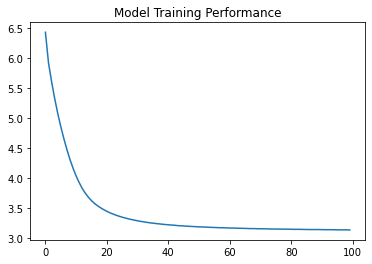

In [19]:
plt.plot(history.history['loss'])
plt.title('Model Training Performance')

In [20]:
model2 = keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4_input (InputLayer)  [(None, 1467)]            0         
                                                                 
 dense_4 (Dense)             (None, 100)               146800    
                                                                 
Total params: 146,800
Trainable params: 146,800
Non-trainable params: 0
_________________________________________________________________


In [21]:
word_vectors = []

for i in range(num_neurons):
    word_vectors.append(one_hot_encode(i, num_neurons))

word_vectors = np.array(word_vectors)

enc = model2.predict(word_vectors)

46/46 [==============================] - 0s 2ms/step


In [22]:
lyrics_file = open('johnny-cash.txt', 'r')
text2 = lyrics_file.read()
lyrics_file.close()

tokens2 = preprocess(tokenize(text2))

word_to_id2, id_to_word2 = mapping(tokens2)
print(word_to_id2)

X2, y2 = generate_training_data(tokens2, word_to_id2, 3)

X2.shape

9008 tokens generated
Token Mapping Complete
{'four': 0, 'fun': 1, 'underneath': 2, 'arizona': 3, 'prison': 4, 'eggs': 5, 'pistol': 6, 'saloon': 7, 'sky': 8, 'guitar': 9, 'whose': 10, 'gypsies': 11, 'bob': 12, "string's": 13, 'tarry': 14, 'engineer': 15, 'want': 16, 'bent': 17, 'delaware': 18, 'springfield': 19, 'cooking': 20, 'cocaine': 21, 'canvas': 22, 'alibi': 23, 'bones': 24, 'interruption': 25, 'kill': 26, 'meant': 27, 'easier': 28, 'coat': 29, 'dumb': 30, 'tollaperson': 31, 'lying': 32, 'fix': 33, 'ago': 34, 'quit': 35, 'fancy': 36, 'finest': 37, 'wheeler': 38, 'kettledrum': 39, 'dry': 40, 'brighten': 41, 'bide': 42, 'sat': 43, 'fall': 44, 'marked': 45, 'killed': 46, 'telephone': 47, 'bright': 48, 'shines': 49, "believen'": 50, 'made': 51, 'friends': 52, 'grits': 53, "bendin'": 54, 'queen': 55, 'snowball': 56, 'lord': 57, 'serve': 58, 'jordan': 59, "callin'": 60, 'grande': 61, 'battled': 62, 'wreath': 63, "lady's": 64, 'cedar': 65, 'info': 66, 'service': 67, 'celebrated': 68, 's

(54036, 2280)

In [23]:
num_neurons2 = X2.shape[1]
print(num_neurons2)
model3 = keras.Sequential()
model3.add(keras.layers.Dense(100, input_dim=num_neurons2, activation='relu'))
model3.add(keras.layers.Dense(num_neurons2, activation='softmax'))

model3.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history2 = model3.fit(X2, y2, epochs=100, batch_size=128)
model3.summary()

2280
Epoch 1/100
423/423 [==============================] - 6s 12ms/step - loss: 7.1211 - accuracy: 0.0093
Epoch 2/100
423/423 [==============================] - 5s 11ms/step - loss: 6.8679 - accuracy: 0.0158
Epoch 3/100
423/423 [==============================] - 5s 11ms/step - loss: 6.6942 - accuracy: 0.0336
Epoch 4/100
423/423 [==============================] - 5s 12ms/step - loss: 6.4194 - accuracy: 0.0532
Epoch 5/100
423/423 [==============================] - 5s 12ms/step - loss: 6.1236 - accuracy: 0.0656
Epoch 6/100
423/423 [==============================] - 5s 11ms/step - loss: 5.8335 - accuracy: 0.0749
Epoch 7/100
423/423 [==============================] - 5s 11ms/step - loss: 5.5563 - accuracy: 0.0820
Epoch 8/100
423/423 [==============================] - 5s 12ms/step - loss: 5.3012 - accuracy: 0.0843
Epoch 9/100
423/423 [==============================] - 5s 11ms/step - loss: 5.0746 - accuracy: 0.0862
Epoch 10/100
423/423 [==============================] - 5s 12ms/step - loss: 

Text(0.5, 1.0, 'Model Training Performance')

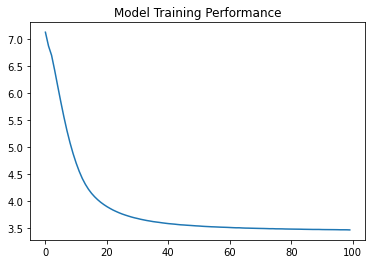

In [24]:
plt.plot(history2.history['loss'])
plt.title('Model Training Performance')

In [25]:
model4 = keras.Model(inputs=model3.inputs, outputs=model3.layers[0].output)
model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6_input (InputLayer)  [(None, 2280)]            0         
                                                                 
 dense_6 (Dense)             (None, 100)               228100    
                                                                 
Total params: 228,100
Trainable params: 228,100
Non-trainable params: 0
_________________________________________________________________


In [26]:
word_vectors2 = []

for i in range(num_neurons2):
    word_vectors2.append(one_hot_encode(i, num_neurons2))

word_vectors2 = np.array(word_vectors2)

enc2 = model4.predict(word_vectors2)
print(enc2.shape)

72/72 [==============================] - 0s 3ms/step
(2280, 100)


{'images': 5.2090955, 'guru': 5.287603, 'evolution': 5.2972016, 'sharing': 5.3475313, 'controlled': 5.394031, 'change': 5.4009647, 'deva': 5.4424157, 'join': 5.464207, 'institution': 5.490421, 'blind': 5.5046186}


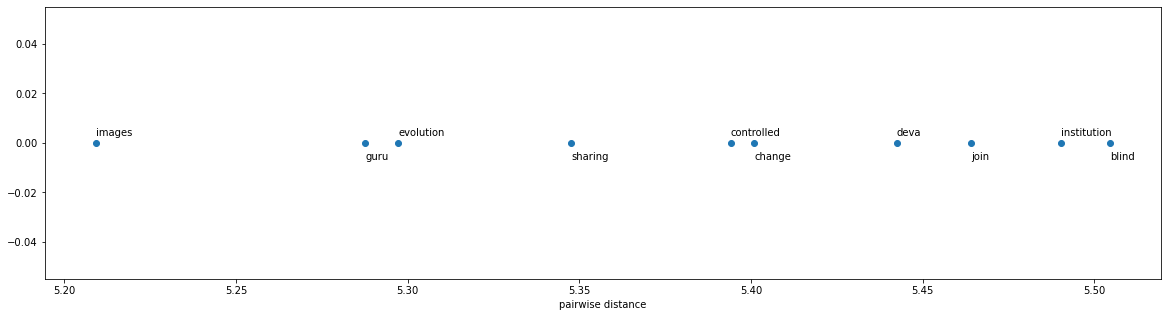

In [39]:
p = list()
target = np.array(enc[word_to_id.get('world')])

for i in range(num_neurons):
    p.append(np.linalg.norm(target - np.array(enc[i])))

p = np.array(p)
a = list(np.argsort(p))

lab = list()
pp = list()

dic = {}

fig, ax = plt.subplots()
fig.set_size_inches(20,5)

for k in range(1,11):
    lab.append(id_to_word.get(a[k]))
    pp.append([p[a[k]]])
    dic[id_to_word.get(a[k])] = p[a[k]]

plt.scatter(pp, np.zeros((10)))
plt.xlabel('pairwise distance')

print(dic)

pp = np.array(pp)

for k in range(10):
    plt.annotate(lab[k], (pp[k], 0.005*math.pow(-1, k) - 0.002))

{'insisting': 5.381413, 'traveling': 5.4719815, 'field': 5.483018, 'rough': 5.6616726, 'struggle': 5.7515416, 'lures': 5.7910337, 'ceased': 5.834152, 'sickness': 5.860206, 'meeting': 5.9971337, 'wayfaring': 6.063852}


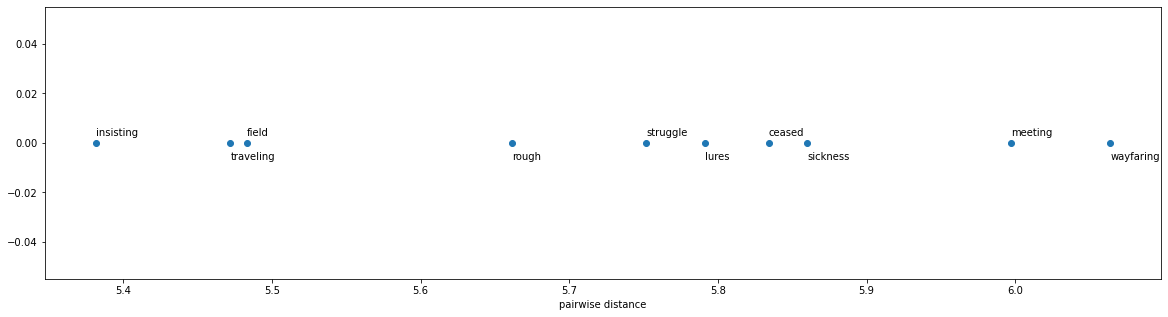

In [40]:
p2 = list()
target2 = np.array(enc2[word_to_id2.get('world')])

for i in range(num_neurons2):
    p2.append(np.linalg.norm(target2 - np.array(enc2[i])))

p2 = np.array(p2)
a2 = list(np.argsort(p2))

lab2 = list()
pp2 = list()

dic2 = {}

fig2, ax2 = plt.subplots()
fig2.set_size_inches(20,5)
for k in range(1,11):
    lab2.append(id_to_word2.get(a2[k]))
    pp2.append([p2[a2[k]]])
    dic2[id_to_word2.get(a2[k])] = p2[a2[k]]

plt.scatter(pp2, np.zeros((10)))
plt.xlabel('pairwise distance')

print(dic2)

pp2 = np.array(pp2)

for k in range(10):
    plt.annotate(lab2[k], (pp2[k], 0.005*math.pow(-1, k) - 0.002))